In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.callbacks import EarlyStopping
import keras.backend as K

In [3]:
base_dir = r'C:\Users\firoj\OneDrive\Desktop\thesis_test\Thesis_test_01\Feature_matrix\AIS_Weather\\'
os.chdir(base_dir)

In [4]:
# Load the datasets
X_train = np.load(base_dir + 'X_train.npy')
X_val = np.load(base_dir + 'X_val.npy')
X_test = np.load(base_dir + 'X_test.npy')

y_train = np.load(base_dir + 'y_train.npy')
y_val = np.load(base_dir + 'y_val.npy')
y_test = np.load(base_dir + 'y_test.npy')

In [5]:
# Reshape X_train to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("New shape of X_train:", X_train.shape)

New shape of X_train: (34654, 1, 10)


In [6]:
# Define RMSE as a custom metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [7]:
input_shape = (X_train.shape[1], X_train.shape[2]) # timesteps, features

In [8]:
# Model architecture with L1 Regularization using GRU
model = Sequential([
    GRU(50, return_sequences=True, input_shape=input_shape, kernel_regularizer=l1(0.01)),
    Dropout(0.2),
    GRU(50, kernel_regularizer=l1(0.01)),
    Dropout(0.2),
    Dense(1)
])

In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.006793806619350815), 
              loss='mean_squared_error', 
              metrics=['mse', rmse, 'mae', 'mape'])

In [10]:
# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 50)             9300      
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 gru_1 (GRU)                 (None, 50)                15300     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 24651 (96.29 KB)
Trainable params: 24651 (96.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Fit the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/100
1083/1083 [==============================] - 8s 4ms/step - loss: 225624.4062 - mse: 225600.6562 - rmse: 463.0386 - mae: 266.3871 - mape: 2223512320.0000 - val_loss: 164815.5312 - val_mse: 164780.0469 - val_rmse: 395.6367 - val_mae: 224.5654 - val_mape: 2267785472.0000
Epoch 2/100
1083/1083 [==============================] - 3s 3ms/step - loss: 137968.4688 - mse: 137926.3438 - rmse: 362.3355 - mae: 211.4507 - mape: 2363005952.0000 - val_loss: 112928.7188 - val_mse: 112881.2734 - val_rmse: 327.7051 - val_mae: 190.9937 - val_mape: 1948732032.0000
Epoch 3/100
1083/1083 [==============================] - 3s 3ms/step - loss: 105095.0938 - mse: 105043.5391 - rmse: 316.9689 - mae: 190.0513 - mape: 2264914944.0000 - val_loss: 91216.2656 - val_mse: 91160.9766 - val_rmse: 294.8537 - val_mae: 178.3605 - val_mape: 2272885504.0000
Epoch 4/100
1083/1083 [==============================] - 4s 3ms/step - loss: 89207.4609 - mse: 89148.8594 - rmse: 291.8259 - mae: 177.6558 - mape: 2290787072.0

1083/1083 [==============================] - 3s 3ms/step - loss: 44758.9961 - mse: 44642.3164 - rmse: 204.1417 - mae: 121.5000 - mape: 1973376000.0000 - val_loss: 31940.0508 - val_mse: 31822.6660 - val_rmse: 171.2184 - val_mae: 99.0826 - val_mape: 1742519552.0000
Epoch 31/100
1083/1083 [==============================] - 4s 3ms/step - loss: 43341.5859 - mse: 43223.5117 - rmse: 200.5030 - mae: 120.6646 - mape: 1981489280.0000 - val_loss: 31923.2305 - val_mse: 31804.5586 - val_rmse: 170.6260 - val_mae: 99.2738 - val_mape: 1904282880.0000
Epoch 32/100
1083/1083 [==============================] - 4s 3ms/step - loss: 43322.0469 - mse: 43202.7812 - rmse: 200.3238 - mae: 119.7331 - mape: 2013956480.0000 - val_loss: 31445.1367 - val_mse: 31325.2500 - val_rmse: 169.4570 - val_mae: 98.4083 - val_mape: 1855101696.0000
Epoch 33/100
1083/1083 [==============================] - 3s 3ms/step - loss: 43070.7656 - mse: 42950.2461 - rmse: 199.6127 - mae: 119.3576 - mape: 2009902848.0000 - val_loss: 31834.

In [13]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

233/233 [==============================] - 0s 943us/step - loss: 30094.1406 - mse: 29953.5469 - rmse: 164.8467 - mae: 93.0324 - mape: 1609260160.0000
Test Loss: [30094.140625, 29953.546875, 164.84669494628906, 93.03237915039062, 1609260160.0]


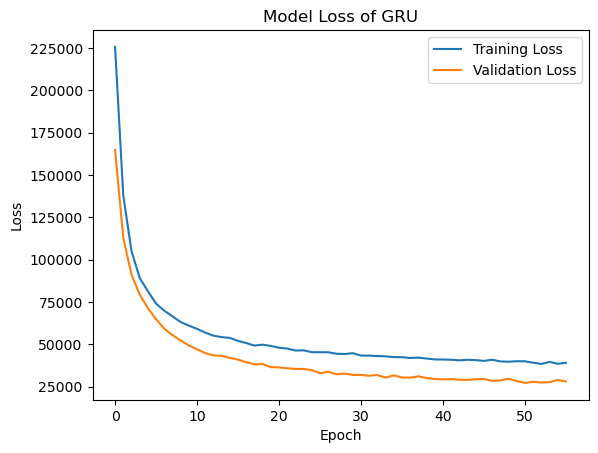

In [14]:
# Assuming history is the output of the model.fit() method
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss of GRU')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [15]:
y_pred = model.predict(X_test).flatten()  # Flatten predictions to ensure it's a 1D array
y_test_flattened = y_test.flatten()  # Flatten actual values for consistency

233/233 [==============================] - 1s 929us/step


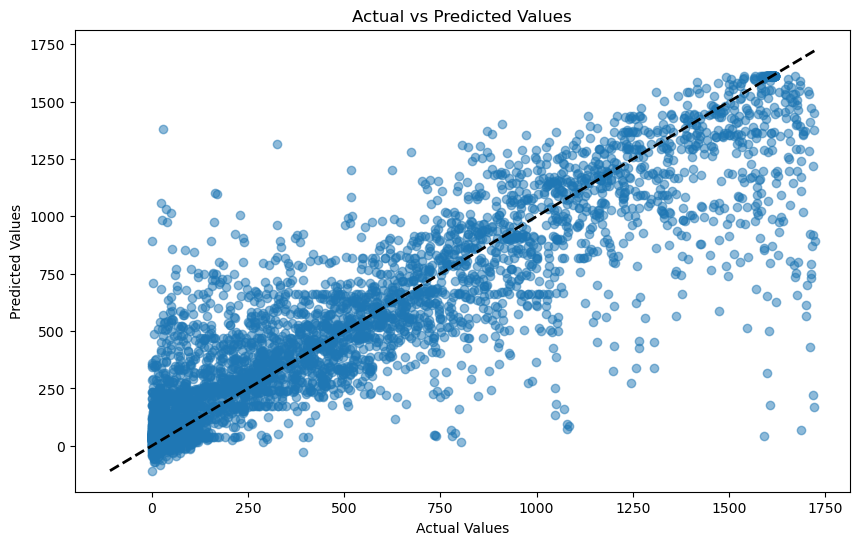

In [16]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_flattened, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plot a line of perfect predictions for reference
max_val = max(y_test_flattened.max(), y_pred.max())
min_val = min(y_test_flattened.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)  # Black dashed line for perfect predictions

plt.show()

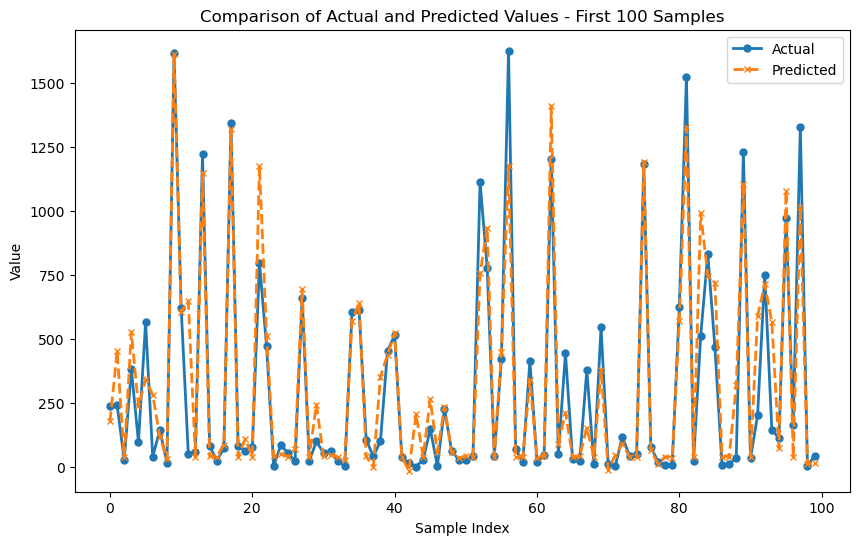

In [17]:
# Plotting a line plot for a clearer comparison for a subset
plt.figure(figsize=(10, 6))
plt.plot(y_test_flattened[:100], marker='o', label='Actual', linewidth=2, markersize=5)
plt.plot(y_pred[:100], marker='x', linestyle='--', label='Predicted', linewidth=2, markersize=5)
plt.title('Comparison of Actual and Predicted Values - First 100 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

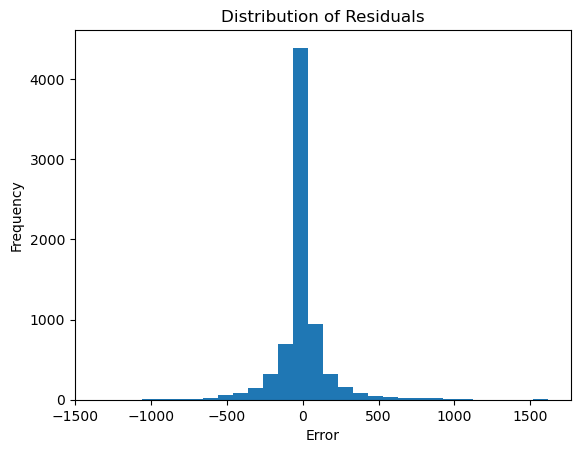

In [18]:
# Calculating residuals
residuals = y_test - y_pred.squeeze()  # Adjust dimensions if necessary

# Plotting the histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [19]:
# Evaluate the model
loss, mse, rmse, mae, mape = model.evaluate(X_test, y_test)
print("Test loss (MSE):", loss)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

233/233 [==============================] - 0s 990us/step - loss: 30094.1406 - mse: 29953.5469 - rmse: 164.8467 - mae: 93.0324 - mape: 1609260160.0000
Test loss (MSE): 30094.140625
Mean Squared Error (MSE): 29953.546875
Root Mean Squared Error (RMSE): 164.84669494628906
Mean Absolute Error (MAE): 93.03237915039062
Mean Absolute Percentage Error (MAPE): 1609260160.0
